In [194]:
%autoreload

import PIL

from training_generator import CharacterAugmentor

import Augmentor
import numpy as np
import os
import random
import glob

import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib inline

In [3]:
root_directory = '/Users/gavinpeterkin/workspace/kaggle_competitions/digit_rec/raw_char_images'

In [14]:
os.path.abspath('.')

'/Users/gavinpeterkin/workspace/kaggle_competitions/digit_rec'

In [9]:
# Everything here is a dir
directories = glob.glob(root_directory + '/*')

print("Folders (classes) found: %s " % [os.path.split(x)[1] for x in directories])

Folders (classes) found: ['61', '59', '66', '50', '68', '57', '3b', '6f', '6a', '32', '35', '69', '56', '51', '3d', '58', '67', '60', '34', '5a', '5f', '33', '4e', '27', '4b', '7d', '29', '42', '45', '73', '74', '28', '7b', '7e', '4c', '26', '21', '4d', '75', '72', '44', '2a', '2f', '43', '6b', '38', '6e', '36', '5c', '5d', '31', '65', '62', '3a', '54', '53', '30', '5e', '5b', '37', '6d', '6c', '39', '52', '55', '63', '64', '46', '2c', '79', '2d', '41', '77', '48', '70', '4a', '24', '23', '4f', '71', '76', '49', '40', '2e', '2b', '47', '78', '7a', '22', '25'] 


In [15]:
'61'.decode('hex')

'a'

In [10]:
pipelines = {}
for directory in directories:
    print("Folder %s:" % (directory))
    pipelines[os.path.split(directory)[1]] = (Augmentor.Pipeline(directory))
    print("\n----------------------------\n")

Folder /Users/gavinpeterkin/workspace/kaggle_competitions/digit_rec/raw_char_images/61:
Initialised with 49 image(s) found.
Output directory set to /Users/gavinpeterkin/workspace/kaggle_competitions/digit_rec/raw_char_images/61/output.
----------------------------

Folder /Users/gavinpeterkin/workspace/kaggle_competitions/digit_rec/raw_char_images/59:
Initialised with 49 image(s) found.
Output directory set to /Users/gavinpeterkin/workspace/kaggle_competitions/digit_rec/raw_char_images/59/output.
----------------------------

Folder /Users/gavinpeterkin/workspace/kaggle_competitions/digit_rec/raw_char_images/66:
Initialised with 49 image(s) found.
Output directory set to /Users/gavinpeterkin/workspace/kaggle_competitions/digit_rec/raw_char_images/66/output.
----------------------------

Folder /Users/gavinpeterkin/workspace/kaggle_competitions/digit_rec/raw_char_images/50:
Initialised with 49 image(s) found.
Output directory set to /Users/gavinpeterkin/workspace/kaggle_competitions/dig

Output directory set to /Users/gavinpeterkin/workspace/kaggle_competitions/digit_rec/raw_char_images/7b/output.
----------------------------

Folder /Users/gavinpeterkin/workspace/kaggle_competitions/digit_rec/raw_char_images/7e:
Initialised with 49 image(s) found.
Output directory set to /Users/gavinpeterkin/workspace/kaggle_competitions/digit_rec/raw_char_images/7e/output.
----------------------------

Folder /Users/gavinpeterkin/workspace/kaggle_competitions/digit_rec/raw_char_images/4c:
Initialised with 49 image(s) found.
Output directory set to /Users/gavinpeterkin/workspace/kaggle_competitions/digit_rec/raw_char_images/4c/output.
----------------------------

Folder /Users/gavinpeterkin/workspace/kaggle_competitions/digit_rec/raw_char_images/26:
Initialised with 49 image(s) found.
Output directory set to /Users/gavinpeterkin/workspace/kaggle_competitions/digit_rec/raw_char_images/26/output.
----------------------------

Folder /Users/gavinpeterkin/workspace/kaggle_competitions/di

Initialised with 49 image(s) found.
Output directory set to /Users/gavinpeterkin/workspace/kaggle_competitions/digit_rec/raw_char_images/55/output.
----------------------------

Folder /Users/gavinpeterkin/workspace/kaggle_competitions/digit_rec/raw_char_images/63:
Initialised with 49 image(s) found.
Output directory set to /Users/gavinpeterkin/workspace/kaggle_competitions/digit_rec/raw_char_images/63/output.
----------------------------

Folder /Users/gavinpeterkin/workspace/kaggle_competitions/digit_rec/raw_char_images/64:
Initialised with 49 image(s) found.
Output directory set to /Users/gavinpeterkin/workspace/kaggle_competitions/digit_rec/raw_char_images/64/output.
----------------------------

Folder /Users/gavinpeterkin/workspace/kaggle_competitions/digit_rec/raw_char_images/46:
Initialised with 49 image(s) found.
Output directory set to /Users/gavinpeterkin/workspace/kaggle_competitions/digit_rec/raw_char_images/46/output.
----------------------------

Folder /Users/gavinpeter

In [11]:
for p in pipelines.values():
    print("Class %s has %s samples." % (p.augmentor_images[0].class_label, len(p.augmentor_images)))

Class 24 has 49 samples.
Class 25 has 49 samples.
Class 26 has 49 samples.
Class 27 has 49 samples.
Class 21 has 49 samples.
Class 22 has 49 samples.
Class 23 has 49 samples.
Class 28 has 49 samples.
Class 29 has 49 samples.
Class 5e has 49 samples.
Class 5d has 49 samples.
Class 5f has 49 samples.
Class 5a has 49 samples.
Class 5c has 49 samples.
Class 5b has 49 samples.
Class 59 has 49 samples.
Class 58 has 49 samples.
Class 55 has 49 samples.
Class 54 has 49 samples.
Class 57 has 49 samples.
Class 56 has 49 samples.
Class 51 has 49 samples.
Class 50 has 49 samples.
Class 53 has 49 samples.
Class 52 has 49 samples.
Class 2d has 49 samples.
Class 2e has 49 samples.
Class 2f has 49 samples.
Class 2a has 49 samples.
Class 2b has 49 samples.
Class 2c has 49 samples.
Class 3b has 49 samples.
Class 3a has 49 samples.
Class 3d has 49 samples.
Class 39 has 49 samples.
Class 38 has 49 samples.
Class 33 has 49 samples.
Class 32 has 49 samples.
Class 31 has 49 samples.
Class 30 has 49 samples.


In [12]:
p = pipelines['4a']

In [13]:
for pipeline in pipelines.values():
    pipeline.rotate_random_90(probability=0.75)
    pipeline.shear(probability=0.5, max_shear_left=20, max_shear_right=20)
    p.random_distortion(
        probability=0.8, grid_width=8, grid_height=8, magnitude=5
    )

In [221]:
chAug = CharacterAugmentor()

Initialised with 49 image(s) found.
Output directory set to /Users/gavinpeterkin/workspace/kaggle_competitions/digit_rec/raw_char_images/61/output.Initialised with 49 image(s) found.
Output directory set to /Users/gavinpeterkin/workspace/kaggle_competitions/digit_rec/raw_char_images/59/output.Initialised with 49 image(s) found.
Output directory set to /Users/gavinpeterkin/workspace/kaggle_competitions/digit_rec/raw_char_images/66/output.Initialised with 49 image(s) found.
Output directory set to /Users/gavinpeterkin/workspace/kaggle_competitions/digit_rec/raw_char_images/50/output.Initialised with 49 image(s) found.
Output directory set to /Users/gavinpeterkin/workspace/kaggle_competitions/digit_rec/raw_char_images/68/output.Initialised with 49 image(s) found.
Output directory set to /Users/gavinpeterkin/workspace/kaggle_competitions/digit_rec/raw_char_images/57/output.Initialised with 49 image(s) found.
Output directory set to /Users/gavinpeterkin/workspace/kaggle_competitions/digit_r

Output directory set to /Users/gavinpeterkin/workspace/kaggle_competitions/digit_rec/raw_char_images/79/output.Initialised with 49 image(s) found.
Output directory set to /Users/gavinpeterkin/workspace/kaggle_competitions/digit_rec/raw_char_images/2d/output.Initialised with 49 image(s) found.
Output directory set to /Users/gavinpeterkin/workspace/kaggle_competitions/digit_rec/raw_char_images/41/output.Initialised with 49 image(s) found.
Output directory set to /Users/gavinpeterkin/workspace/kaggle_competitions/digit_rec/raw_char_images/77/output.Initialised with 49 image(s) found.
Output directory set to /Users/gavinpeterkin/workspace/kaggle_competitions/digit_rec/raw_char_images/48/output.Initialised with 49 image(s) found.
Output directory set to /Users/gavinpeterkin/workspace/kaggle_competitions/digit_rec/raw_char_images/70/output.Initialised with 49 image(s) found.
Output directory set to /Users/gavinpeterkin/workspace/kaggle_competitions/digit_rec/raw_char_images/4a/output.Initial

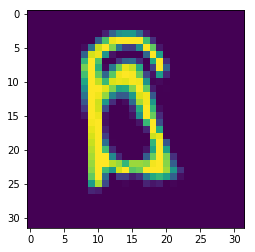

In [170]:
plt.imshow(gen.next()[0]);

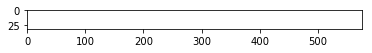

In [239]:
fig, ax = plt.subplots(nrows=1, ncols=1)

text = 'Can YOU read this?'
framecount = 50
generators = []
width = 32

def empty_generator():
    while True:
        yield (PIL.Image.fromarray(np.zeros((32, 32))), None)

for char in text:
    if char == ' ':
        gen = empty_generator()
    else:
        gen = chAug.pipelines[char.encode('hex')].image_generator()
    generators.append(gen)

ims = []
current_image_stack = [
    np.asarray(gen.next()[0]) for gen in generators
]
for f in range(framecount):
#     import pdb; pdb.set_trace()
    for img_num, img_arr in enumerate(current_image_stack):
        if np.random.random() > 0.7:
            current_image_stack[img_num] = np.asarray(
                generators[img_num].next()[0]
            )
    
    im = plt.imshow(np.hstack(current_image_stack))
    ims.append([im])
    
ani = animation.ArtistAnimation(
    fig, ims, interval=500
)

ani.save('/Users/gavinpeterkin/Desktop/out/test.mp4')

In [191]:
plt.imshow(generators[0].next()[0])

TypeError: unsupported operand type(s) for +: 'Image' and 'tuple'

In [229]:
def empty_generator():
    while True:
        yield ' '

In [235]:
# empty_gen = empty_generator()

empty_gen.next()

' '

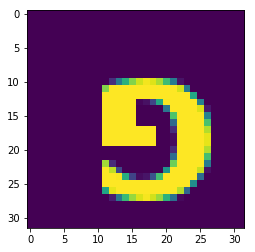

In [197]:
plt.imshow(PIL.ImageChops.offset(img, ))

In [224]:
'20'.decode('hex')

' '